### Importing libraries:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler as scaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn import linear_model
from seaborn import pairplot as pplot
from sklearn.metrics import precision_score, recall_score, f1_score

### loading the dataset:

In [2]:
# loading the dataset

#data = pd.read_csv("C:\\Users\\REJI\\Desktop\\Sharon Reji\\SEM-V\\Machine Learning mini project\\Dataset\\banknote_data.csv")
#data

In [3]:
data = pd.read_csv('C:/Users/Aditi/Documents/Manipal/3rd year/ML/Mini Project/banknote_data.csv')
data

,variance,skewness,kurtosis,entropy,class
0,3.62160,8.66610,-2.8073,-0.44699,0
1,4.54590,8.16740,-2.4586,-1.46210,0
2,3.86600,-2.63830,1.9242,0.10645,0
3,3.45660,9.52280,-4.0112,-3.59440,0
4,0.32924,-4.45520,4.5718,-0.98880,0
...,...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949,1
1368,-1.38870,-4.87730,6.4774,0.34179,1
1369,-3.75030,-13.45860,17.5932,-2.77710,1
1370,-3.56370,-8.38270,12.3930,-1.28230,1


In [4]:
d = data.to_numpy()
d

array([[  3.6216 ,   8.6661 ,  -2.8073 ,  -0.44699,   0.     ],
       [  4.5459 ,   8.1674 ,  -2.4586 ,  -1.4621 ,   0.     ],
       [  3.866  ,  -2.6383 ,   1.9242 ,   0.10645,   0.     ],
       ...,
       [ -3.7503 , -13.4586 ,  17.5932 ,  -2.7771 ,   1.     ],
       [ -3.5637 ,  -8.3827 ,  12.393  ,  -1.2823 ,   1.     ],
       [ -2.5419 ,  -0.65804,   2.6842 ,   1.1952 ,   1.     ]])

In [5]:
cols = data.columns
cols

Index(['variance', 'skewness', 'kurtosis', 'entropy', 'class'], dtype='object')

### Exploring data:

In [6]:
data.isna().sum()

variance    0
skewness    0
kurtosis    0
entropy     0
class       0
dtype: int64

In [7]:
data.isnull().sum()

variance    0
skewness    0
kurtosis    0
entropy     0
class       0
dtype: int64

Data has no null values

In [8]:
print(data.corr())

          variance  skewness  kurtosis   entropy     class
variance  1.000000  0.264026 -0.380850  0.276817 -0.724843
skewness  0.264026  1.000000 -0.786895 -0.526321 -0.444688
kurtosis -0.380850 -0.786895  1.000000  0.318841  0.155883
entropy   0.276817 -0.526321  0.318841  1.000000 -0.023424
class    -0.724843 -0.444688  0.155883 -0.023424  1.000000


In [9]:
data.describe()

,variance,skewness,kurtosis,entropy,class
count,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.397627,-1.191657,0.444606
std,2.842763,5.869047,4.310030,2.101013,0.497103
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.773000,-1.708200,-1.574975,-2.413450,0.000000
50%,0.496180,2.319650,0.616630,-0.586650,0.000000
75%,2.821475,6.814625,3.179250,0.394810,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


In [10]:
data.dtypes

variance    float64
skewness    float64
kurtosis    float64
entropy     float64
class         int64
dtype: object

In [11]:
data.groupby(cols[-1]).count()

,variance,skewness,kurtosis,entropy
class,,,,
0,762,762,762,762
1,610,610,610,610


### Some graphs to show patterns in data:

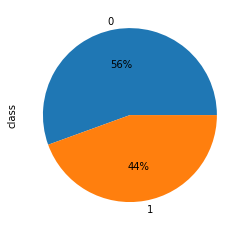

In [12]:
# plotting a piechart of the dataset

data[cols[-1]].value_counts().plot(kind='pie', autopct='%1.0f%%')

# the below plot shows that 56% of the notes are genuine whereas 44% of it is fake

C:\Users\Aditi\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\Aditi\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


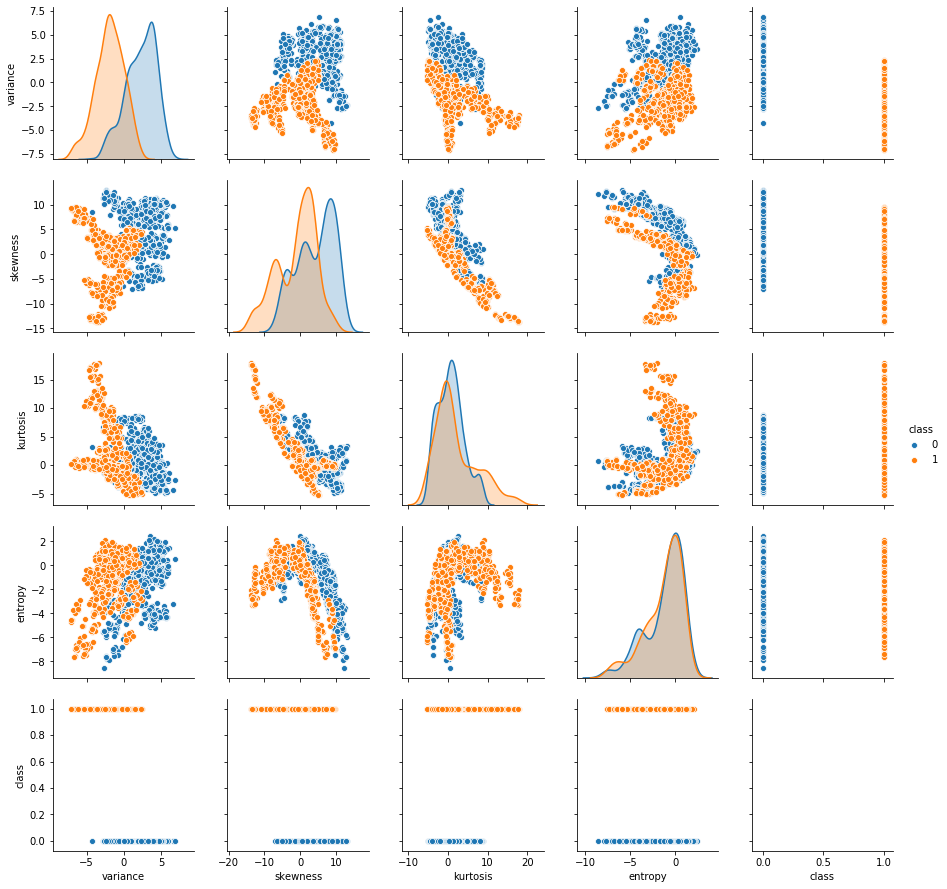

In [13]:
#pair plots between all features of data:

pplot(data, hue = 'class')
plt.show()

## Implementing Logistic Regression:

In [14]:
# using sigmoid function for making predictions
def sigmoid(z):
    return 1/(1+np.exp(-z))

In [15]:
def calculate_coefficients(X,Y,learning_rate,num_iterations,b0,b1,b2,b3,b4):
    m= len(Y)
    B0=0
    B1=0
    B2=0
    B3=0
    B4=0
    errors=[]
    
    
    for i in range(num_iterations):
        Z = B0 + B1 * X[cols[0]] + B2 * X[cols[1]] + B3 * X[cols[2]] + B4 * X[cols[3]]        
        predictions = sigmoid(Z)
        error = -(1/m) * np.sum(Y* np.log(predictions)) + (1-Y)* np.log(1-predictions)
        B0-= learning_rate * (1/m) * np.sum(predictions-Y)
        B1-= learning_rate* (1/m) * np.sum((predictions-Y) * X[cols[0]])
        B2-= learning_rate* (1/m) * np.sum((predictions-Y) * X[cols[1]])
        B3-= learning_rate* (1/m) * np.sum((predictions-Y) * X[cols[2]])
        B4-= learning_rate* (1/m) * np.sum((predictions-Y) * X[cols[3]])
        
        b0.append(B0)
        b1.append(B1)
        b2.append(B2)
        b3.append(B3)
        b4.append(B4)
        errors.append(error)
        
    return B0,B1,B2,B3,B4,errors,b0,b1,b2,b3,b4    
        

In [16]:
learning_rate=0.01
num_iterations=10
X=data.iloc[:, :-1]
Y=data[cols[-1]]
b0=[]
b1=[]
b2=[]
b3=[]
b4=[]

B0,B1,B2,B3,B4,errors,b0,b1,b2,b3,b4=calculate_coefficients(X,Y,learning_rate,num_iterations,[],[],[],[],[])

In [17]:
# function to predict the accuracy
def predict(X,B0,B1,B2,B3,B4):
    Z = B0 + B1 * X['variance'] + B2 * X['skewness'] + B3 * X['kurtosis'] + B4 * X['entropy']    
    return sigmoid(Z)

In [18]:
predictions = predict(X,B0,B1,B2,B3,B4)
predicted_labels = (predictions>=0.5).astype(int)
print(f"predicted values manually:{predicted_labels}")


predicted values manually:0       0
1       0
2       0
3       0
4       1
       ..
1367    0
1368    1
1369    1
1370    1
1371    1
Length: 1372, dtype: int32


In [19]:
print(errors[0])

0      -0.384969
1      -0.384969
2      -0.384969
3      -0.384969
4      -0.384969
          ...   
1367    0.308178
1368    0.308178
1369    0.308178
1370    0.308178
1371    0.308178
Length: 1372, dtype: float64


In [20]:
print("Manual Logistic Regression")
print("B0:",B0)
print("B1:",B1)
print("B2:",B2)
print("B3:",B3)
print("B4:",B4)


for i in range(len(errors)):
    print(f"\nInstance:{i+1}: \nB0:{b0[i]}, \nB1:{b1[i]}, \nB2:{b2[i]}, \nB3:{b3[i]}, \nB4:{b4[i]} , \nerror:\n{errors[i]}")

Manual Logistic Regression
B0: -0.0029532076079672224
B1: -0.08995177724154732
B2: -0.08976861053692567
B3: 0.00023193320939708206
B4: -0.004880192150533735

Instance:1: 
B0:-0.000553935860058309, 
B1:-0.010475891761297375, 
B2:-0.014029268781049563, 
B3:0.002563215109001458, 
B4:0.00041563788447521833 , 
error:
0      -0.384969
1      -0.384969
2      -0.384969
3      -0.384969
4      -0.384969
          ...   
1367    0.308178
1368    0.308178
1369    0.308178
1370    0.308178
1371    0.308178
Length: 1372, dtype: float64

Instance:2: 
B0:-0.001035488018355049, 
B1:-0.020527444398319883, 
B2:-0.02646624130737215, 
B3:0.004288466926059425, 
B4:0.000538134083576851 , 
error:
0      -0.312619
1      -0.311605
2      -0.393313
3      -0.305917
4      -0.428358
          ...   
1367    0.300302
1368    0.300302
1369    0.300302
1370    0.300302
1371    0.300302
Length: 1372, dtype: float64

Instance:3: 
B0:-0.0014512411430279847, 
B1:-0.030197219319344208, 
B2:-0.037527868015832896, 
B3:0

In [21]:
# dividing the dataset into training and testing dataset

X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.25, random_state=0)

In [22]:
model= LogisticRegression().fit(X_train,y_train)
print(f"Accuracy:{model.score(X,Y)}")

Accuracy:0.9912536443148688


C:\Users\Aditi\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [23]:
y_pred = model.predict(X_test)
print(f"Predicted values: {y_pred}")
print("\nAccuracy score:")
print(accuracy_score(y_test,y_pred))

Predicted values: [1 0 1 0 0 0 0 0 1 1 0 0 1 0 0 0 1 1 0 0 1 0 0 1 0 1 0 1 0 0 1 0 1 1 1 0 0
 1 0 1 1 1 0 0 1 1 0 0 1 0 0 1 0 1 1 0 1 1 0 1 1 0 0 0 0 1 1 1 1 0 1 0 1 0
 0 1 0 0 0 0 1 1 0 0 1 1 0 0 0 0 0 1 1 1 1 0 0 0 1 1 0 1 0 1 0 1 0 1 1 1 0
 1 0 0 1 0 0 0 1 1 0 0 1 1 1 1 1 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 1 1 0 0 1 0
 0 1 0 0 0 0 1 0 1 0 1 0 0 1 0 1 0 1 1 0 1 1 0 1 1 1 1 0 0 0 1 1 0 1 0 0 0
 1 0 1 1 0 0 0 1 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 1 1 0 0 0 0 0
 0 0 0 1 1 0 0 0 0 1 1 0 1 1 0 0 1 1 0 1 1 0 1 0 0 0 0 0 0 1 0 1 1 0 0 1 1
 1 0 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 1 1 0 0 1 1 1 0 1 0 1 0 0 1 1 1 0 1 1 0
 0 0 1 0 0 1 0 1 1 1 1 0 0 0 0 0 1 0 0 1 1 1 0 0 1 0 1 1 0 1 0 1 1 0 0 0 1
 1 0 1 0 0 1 0 0 0 0]

Accuracy score:
0.9854227405247813


### performing prediction for one instance of data:

In [24]:
# making predictions on a single banknote
data.loc[1350]

variance   -0.21888
skewness   -2.20380
kurtosis   -0.09540
entropy     0.56421
class       1.00000
Name: 1350, dtype: float64

In [25]:
pred_note = scaler().fit_transform(X.values[1350].reshape(1,-1))

# making predictions on pred_note
fake_note = model.predict(pred_note)
print(fake_note)

# The above output =[1] shows that the note is fake.

[1]


In [26]:
class_report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test,y_pred)
acc = accuracy_score(y_test,y_pred)

print("Classification report:\n\n", class_report)
print("Confusion Matrix\n",conf_matrix)
print("\nAccuracy\n",acc)

results = []
results.append(("LogisticRegression",class_report, conf_matrix, acc))

Classification report:

               precision    recall  f1-score   support

           0       1.00      0.97      0.99       195
           1       0.97      1.00      0.98       148

    accuracy                           0.99       343
   macro avg       0.98      0.99      0.99       343
weighted avg       0.99      0.99      0.99       343

Confusion Matrix
 [[190   5]
 [  0 148]]

Accuracy
 0.9854227405247813


In [27]:
print("LOGISTIC REGRESSION")
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')

LOGISTIC REGRESSION
Precision: 0.9673
Recall: 1.0000
F1 Score: 0.9834


# Implementing KNN:

In [28]:
from sklearn.neighbors import KNeighborsClassifier

In [29]:
X=data[['variance', 'skewness']]
Y=data[cols[-1]]

In [30]:
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.25, random_state=0)

### Implementing knn for various values of k

In [31]:
for k in [3, 5, 7]:
    #training knn for each k value
    knn_classifier = KNeighborsClassifier(n_neighbors=k)
    
    knn_classifier.fit(X_train,y_train)
    
    y_pred = knn_classifier.predict(X_test)
    
    accuracy = accuracy_score(y_test,y_pred)
    report = classification_report(y_test,y_pred)
    cmat = confusion_matrix(y_test,y_pred)
    
    print("\nfor k = ", k)
    print("Accuracy: ", accuracy)
    print("Classification Report: ", report)
    print("Confusion Matrix\n",cmat)
    

    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    print(f'Precision: {precision:.4f}')
    print(f'Recall: {recall:.4f}')
    print(f'F1 Score: {f1:.4f}')




for k =  3
Accuracy:  0.9446064139941691
Classification Report:                precision    recall  f1-score   support

           0       0.96      0.94      0.95       195
           1       0.93      0.95      0.94       148

    accuracy                           0.94       343
   macro avg       0.94      0.94      0.94       343
weighted avg       0.94      0.94      0.94       343

Confusion Matrix
 [[184  11]
 [  8 140]]
Precision: 0.9272
Recall: 0.9459
F1 Score: 0.9365

for k =  5
Accuracy:  0.9387755102040817
Classification Report:                precision    recall  f1-score   support

           0       0.96      0.93      0.95       195
           1       0.92      0.95      0.93       148

    accuracy                           0.94       343
   macro avg       0.94      0.94      0.94       343
weighted avg       0.94      0.94      0.94       343

Confusion Matrix
 [[182  13]
 [  8 140]]
Precision: 0.9150
Recall: 0.9459
F1 Score: 0.9302

for k =  7
Accuracy:  0.9329446

### from the above implementation:
Knn model shows best results for k = 3

# Implementation using SVM

In [32]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

In [33]:
#feature scaling

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [34]:
def model_eval(y_pred):
    accuracy = accuracy_score(y_test,y_pred)
    report = classification_report(y_test,y_pred)
    cmat = confusion_matrix(y_test,y_pred)
    
    print("Accuracy: ", accuracy)
    print("Classification Report: ", report)
    print("Confusion Matrix\n",cmat)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    print(f'Precision: {precision:.4f}')
    print(f'Recall: {recall:.4f}')
    print(f'F1 Score: {f1:.4f}')

In [35]:
model = SVC(kernel='linear', C = 0.01)
model.fit(X_test,y_test)

y_test_pred = model.predict(X_test)

print("Using linear kernel: ")
model_eval(y_test_pred)

Using linear kernel: 
Accuracy:  0.8658892128279884
Classification Report:                precision    recall  f1-score   support

           0       0.86      0.91      0.89       195
           1       0.88      0.80      0.84       148

    accuracy                           0.87       343
   macro avg       0.87      0.86      0.86       343
weighted avg       0.87      0.87      0.87       343

Confusion Matrix
 [[178  17]
 [ 29 119]]
Precision: 0.8750
Recall: 0.8041
F1 Score: 0.8380


In [36]:
poly = SVC(kernel = 'poly', degree = 2) #only 2 features considered for X
poly.fit(X_test,y_test)

y_test_pred = model.predict(X_test)
         
print("Using polynomial kernel: ")
model_eval(y_test_pred)

Using polynomial kernel: 
Accuracy:  0.8658892128279884
Classification Report:                precision    recall  f1-score   support

           0       0.86      0.91      0.89       195
           1       0.88      0.80      0.84       148

    accuracy                           0.87       343
   macro avg       0.87      0.86      0.86       343
weighted avg       0.87      0.87      0.87       343

Confusion Matrix
 [[178  17]
 [ 29 119]]
Precision: 0.8750
Recall: 0.8041
F1 Score: 0.8380


C:\Users\Aditi\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [37]:
rbf = SVC(kernel = 'rbf', random_state = 0)
rbf.fit(X_test,y_test)

y_test_pred = model.predict(X_test)

print("Using Radial Basis function or rbf kernel: ")
model_eval(y_test_pred)

Using Radial Basis function or rbf kernel: 
Accuracy:  0.8658892128279884
Classification Report:                precision    recall  f1-score   support

           0       0.86      0.91      0.89       195
           1       0.88      0.80      0.84       148

    accuracy                           0.87       343
   macro avg       0.87      0.86      0.86       343
weighted avg       0.87      0.87      0.87       343

Confusion Matrix
 [[178  17]
 [ 29 119]]
Precision: 0.8750
Recall: 0.8041
F1 Score: 0.8380


C:\Users\Aditi\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [38]:
sig = SVC(kernel = 'sigmoid')
sig.fit(X_test,y_test)

y_test_pred = model.predict(X_test)

print("Using sigmoidal kernel: ")
model_eval(y_test_pred)

Using sigmoidal kernel: 
Accuracy:  0.8658892128279884
Classification Report:                precision    recall  f1-score   support

           0       0.86      0.91      0.89       195
           1       0.88      0.80      0.84       148

    accuracy                           0.87       343
   macro avg       0.87      0.86      0.86       343
weighted avg       0.87      0.87      0.87       343

Confusion Matrix
 [[178  17]
 [ 29 119]]
Precision: 0.8750
Recall: 0.8041
F1 Score: 0.8380


C:\Users\Aditi\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


# Conclusion:
Best results obtained using logistic regression.


# BAR GRAPH FOR ACCURACY VS ML ALGOS


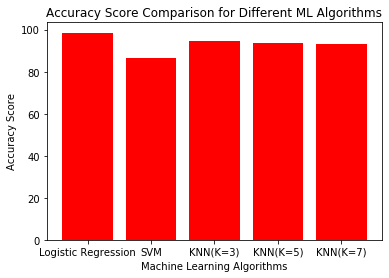

In [39]:
import matplotlib.pyplot as plt

# Replace these with your actual accuracy scores and algorithm names
algorithm_names = ['Logistic Regression','SVM', 'KNN(K=3)','KNN(K=5)','KNN(K=7)']
                   
accuracy_scores = [98.54,86.58, 94.46,93.87,93.29]

# Plotting the bar graph
plt.bar(algorithm_names, accuracy_scores, color='red')

# Adding labels and title
plt.xlabel('Machine Learning Algorithms')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Score Comparison for Different ML Algorithms')


# Display the plot
plt.show()
